In [2]:
# Digit Classification CNN for practice 

# Importing necessary libs 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers 
import numpy as np
import matplotlib.pyplot as plt 


In [ ]:
# Loading the Mnist Dataset 
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

x_train[0] # Before normalizing the pixels 


In [ ]:
# Normalizing the pixel values since pixel is 255 diving the number with 255 will give value between 0 & 1
x_train, x_test = x_train / 255.0, x_test / 255.0 

In [ ]:
x_train[0]  # After normalization

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [5]:
# Expanding the dimensions to fit the CNN input requirements
x_train = np.expand_dims(x_train,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)

In [6]:
# Defining the CNN model 
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


c:\Users\sayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compiling the model 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])  # sparse because the number is integer 0-9


In [8]:
model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8888 - loss: 0.3467 - val_accuracy: 0.9867 - val_loss: 0.0457
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9858 - loss: 0.0465 - val_accuracy: 0.9885 - val_loss: 0.0342
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9896 - loss: 0.0308 - val_accuracy: 0.9879 - val_loss: 0.0424
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9917 - loss: 0.0254 - val_accuracy: 0.9926 - val_loss: 0.0248
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9939 - loss: 0.0193 - val_accuracy: 0.9901 - val_loss: 0.0303


In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.9901 - loss: 0.0303
Test accuracy: 0.9901


In [10]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


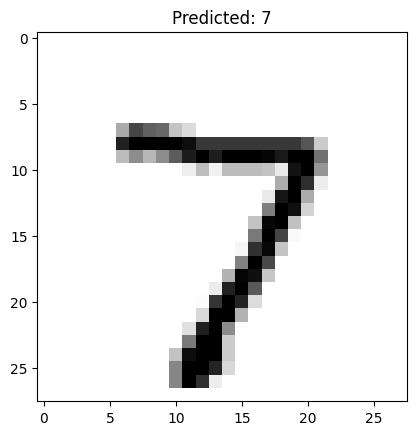

In [11]:
# Display a sample prediction
plt.imshow(x_test[0].reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"Predicted: {np.argmax(predictions[0])}")
plt.show()


In [12]:
# Summary of the model Architecture used here:

# First Conv + Pooling → Extracts low-level features (edges, lines).

# Second Conv + Pooling → Detects textures and patterns.

# Third Conv Layer → Captures higher-level digit features.

# Flatten → Converts feature maps into a vector.

# Dense Layer → Fully connected layer to learn complex patterns.

# Output Layer → Predicts the digit (0-9) using softmax.